**Step 1: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS**

In [5]:
import numpy as np # Multi-dimensional array manipulation
import pandas as pd # DataFrame Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
from sklearn import metrics

In [6]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/Colab Notebooks/335 Machine Learning/Lecture5_Classification_in_Data_Science/"

/content/drive/MyDrive/Colab Notebooks/335 Machine Learning/Lecture5_Classification_in_Data_Science


In [8]:
# Read the CSV file
churn_df = pd.read_csv("telecom_churn.csv")

In [9]:
# Display the feature columns (มี Column ชื่ออะไรบ้าง)
churn_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [10]:
# Check the shape of the dataframe (เช็คขนาดข้อมูลว่ามีกี่แถว กี่คอลัมน์) ->.shape
churn_df.shape

(5000, 21)

In [11]:
# Check data types of each column
churn_df.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

**# Step2: ให้ Check missing value และถ้าในกรณีที่มี missing value ให้เติมค่า Null ด้วย ค่า Mean (ในกรณีที่ข้อมูลเป็นตัวเลข)**

In [12]:
# Check if any missing values are present in the dataframe
# เขียน code เพื่อ check ดูว่ามี missing value หรือไม่
churn_df.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
class                            0
dtype: int64

**# Step3: ในกรณีที่ตัวข้อมูลเป็นกลุ่มของข้อมูล (ข้อความ string, text) ให้เปลี่ยน column นั้น ให้เป็น one hot encoder**

**# Step4: Plot the correlation matrix (heatmap)**

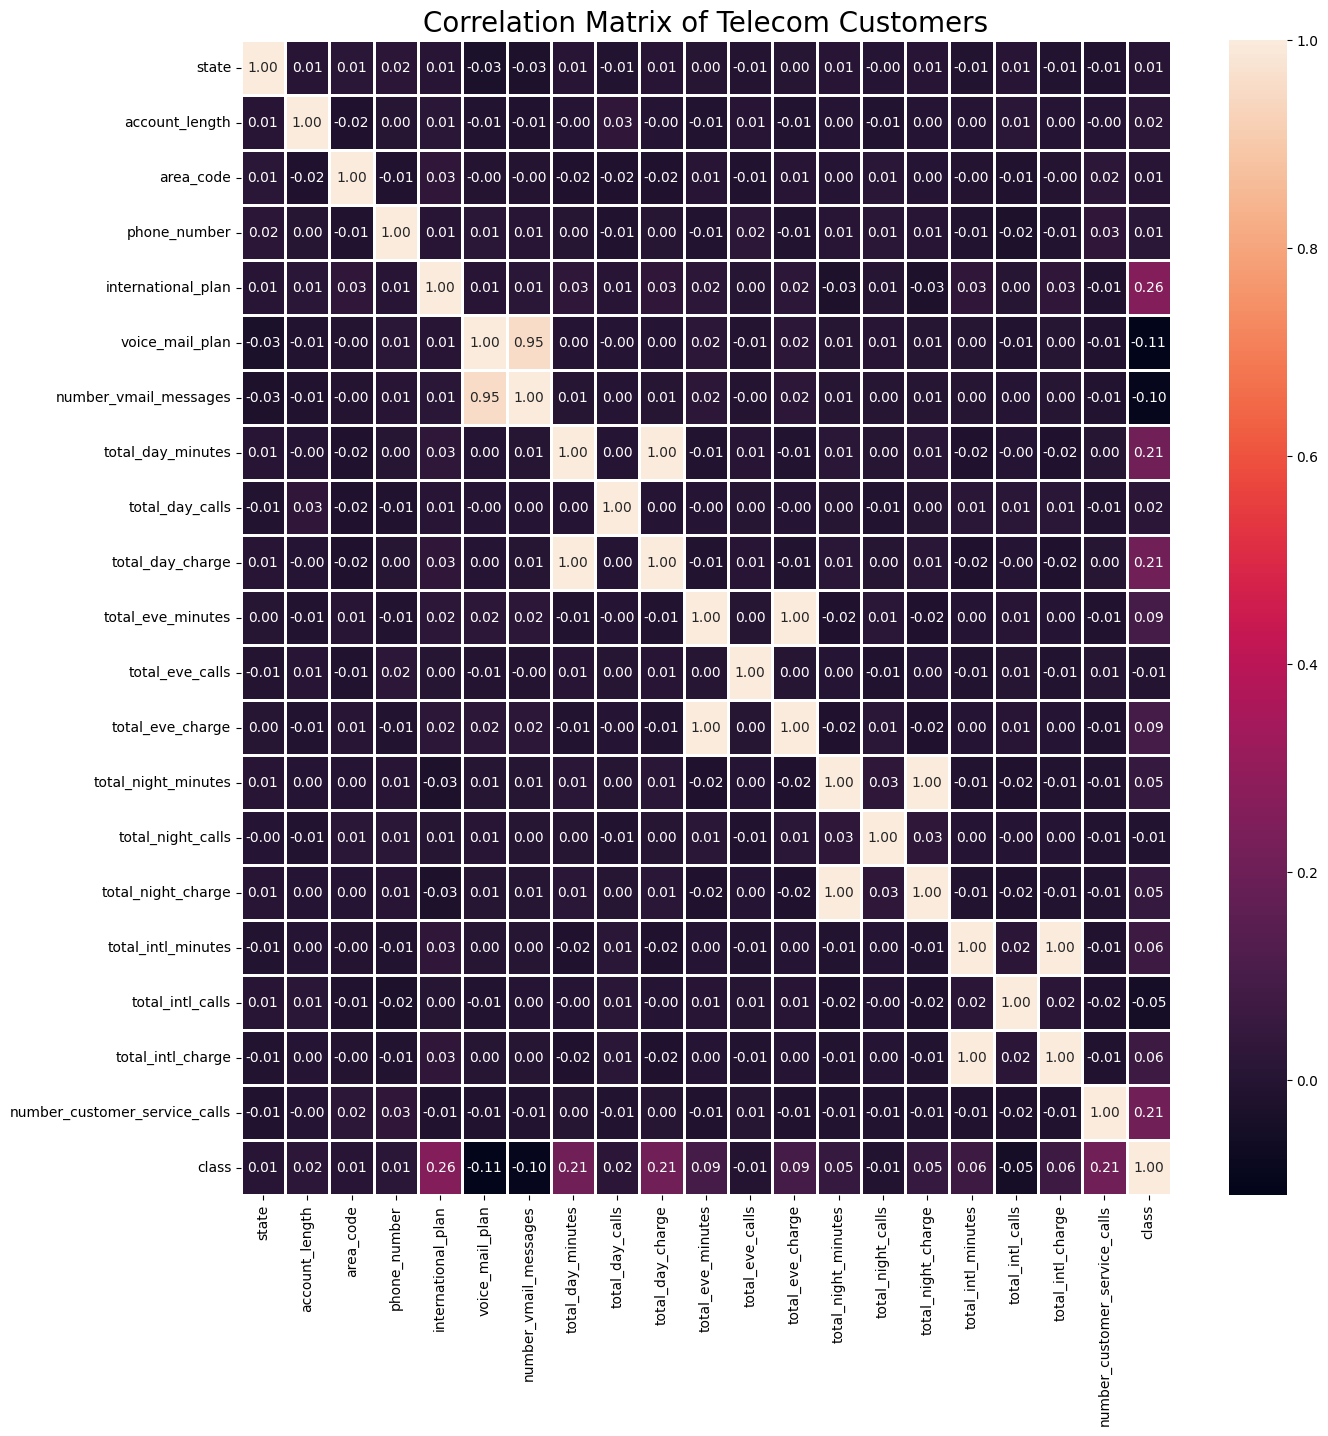

In [13]:
# Correlation Matrix
corr_matrix = churn_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

**# Step5: สร้างตัวแปรสำหรับเก็บ Input data และ Output data**

In [14]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data.
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = churn_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = churn_df["class"]

**# Step6: เตรียมข้อมูลสำหรับ Training data และ Testing data**

In [15]:
# spliting the data into test 20% and train sets 80%
#Training Data เอาไว้สร้าง Model
#Testing Data เอาไว้ทดสอบประสิทธิภาพของ Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

**# Step7: Training Model with Random Forest Algorihtm (สร้าง Model ในการทำนายกลุ่มข้อมูล Churn = 1, No-Churn = 0)**

In [16]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

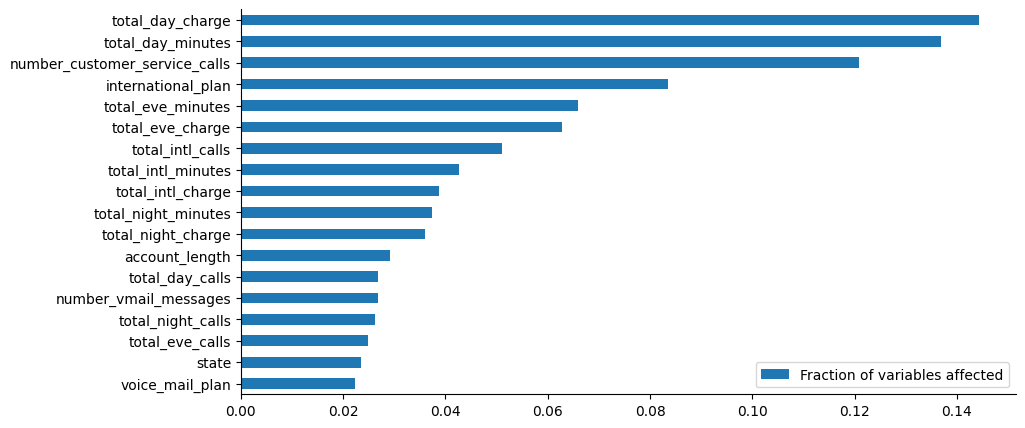

In [17]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : model_rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [18]:
# The above graph is generated by Random Forest algorithm
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

**# Step8: Testing and Evaluating the Performance of Model (ทดสอบประสิทธิภาพของ Model)**

In [19]:
# make predictions on the test data
y_predict = model_rf.predict(X_test)

In [20]:
#Evaluate the performance of model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       861
           1       0.93      0.77      0.84       139

    accuracy                           0.96      1000
   macro avg       0.95      0.88      0.91      1000
weighted avg       0.96      0.96      0.96      1000



In [21]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[853   8]
 [ 32 107]]


**# Step7.2: Training Model with Support Vector Machine Algorihtm (สร้าง Model ในการทำนายกลุ่มข้อมูล Churn = 1, No-Churn = 0)**

In [22]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

**# Step8.2: Testing and Evaluating the Performance of SVM Model (ทดสอบประสิทธิภาพของ Model)**

In [23]:
ySVM_predict = model_svm.predict(X_test)

In [24]:
print(classification_report(y_test, ySVM_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       861
           1       0.57      0.22      0.31       139

    accuracy                           0.87      1000
   macro avg       0.73      0.59      0.62      1000
weighted avg       0.84      0.87      0.84      1000



In [25]:
cm_SVM = confusion_matrix(y_test, ySVM_predict)
print(cm_SVM)

[[838  23]
 [109  30]]


**# Step7.3: Training Model with K-NEAREST NEIGHBOUR (KNN) (สร้าง Model ในการทำนายกลุ่มข้อมูล Churn = 1, No-Churn = 0)**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

**# Step8.3: Testing and Evaluating the Performance of KNN Model (ทดสอบประสิทธิภาพของ Model)**

In [27]:
yKNN_predict = model_knn.predict(X_test)

In [28]:
print(classification_report(y_test, yKNN_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       861
           1       0.84      0.33      0.47       139

    accuracy                           0.90      1000
   macro avg       0.87      0.66      0.71      1000
weighted avg       0.89      0.90      0.88      1000



In [29]:
cm_KNN = confusion_matrix(y_test, yKNN_predict)
print(cm_KNN)

[[852   9]
 [ 93  46]]


In [30]:
# ROC curve
from sklearn.metrics import roc_curve
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)

In [31]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])

print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors

Support Vector Machine:  0.8222244504048329
Random Forest:  0.9128794525355325
K-Nearest Neighbors:  0.6986188053041886


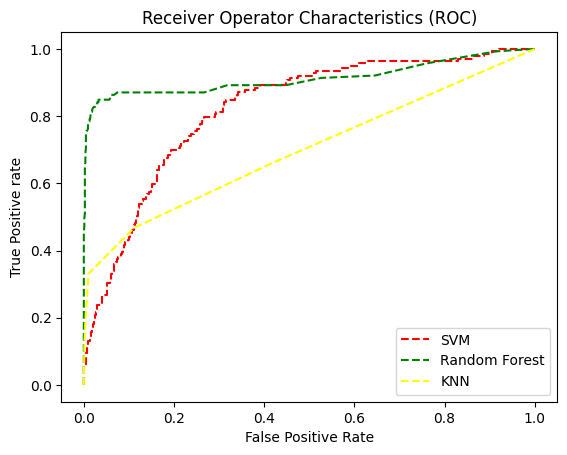

In [32]:
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

**# Step9: Deployment โดยทำการ Save AI Model ที่ได้ เพื่อนำไปใช้ในการ deployement กับข้อมูลชุดใหม่ ที่ไม่ทราบค่า Output (ให้ Model Predict output)**

In [33]:
# loading library


In [34]:
# create an iterator object with write permission - model.pickle and save model


In [35]:
# load saved model


In [36]:
# Read the CSV file ที่เป็นข้อมูลชุดใหม่


In [37]:
# แสดงข้อมูลชุดใหม่ให้เห็น


In [38]:
#แปลงข้อมูลชุดใหม่ที่อ่านมาได้ ให้อยู่ในรูปแบบ array ->np.array


In [39]:
#ใช้ model ที่ load มาทำการ predict ข้อมูลชุดใหม่


**# สรุป Output ที่ได้จากการนำ model ไป deployment**

In [40]:
#แสดงผลลัพธ์ที่ได้จากการ deployment ของข้อมูลชุดใหม่